<class 'numpy.ndarray'>
(248, 35624)
[[0.75709679 0.75655099 0.75461831 ... 0.75787271 0.75722762 0.76213064]
 [0.57519353 0.56595376 0.55152292 ... 0.48226206 0.48329766 0.48382933]
 [0.76639813 0.76220723 0.75976352 ... 0.73835103 0.73913462 0.74171893]
 ...
 [0.78054736 0.78005406 0.77447601 ... 0.78332417 0.77990748 0.78139679]
 [0.5291242  0.52498386 0.51793955 ... 0.47161298 0.46912766 0.47366007]
 [0.49634087 0.48903129 0.47857    ... 0.5523971  0.55285888 0.55528368]]
[0.75149086 0.7488952  0.7437818  0.75409605 0.76354736 0.76123259
 0.75952332 0.76469451 0.76332793 0.76188227 0.76460374 0.76597339
 0.7682449  0.76864732 0.76332672 0.76463511 0.76310438 0.75959704
 0.75979304 0.75887533 0.75819694 0.75385746 0.74698156 0.73342992
 0.73237149 0.73857784 0.74604947 0.74757349 0.74867511 0.74595699
 0.75506014 0.75277572 0.74844028 0.75223526 0.75211998 0.74655655
 0.75672958 0.75687462 0.75051521 0.74980896 0.75023675 0.74704455
 0.75431687 0.74667613 0.75407843 0.75608094 0.745

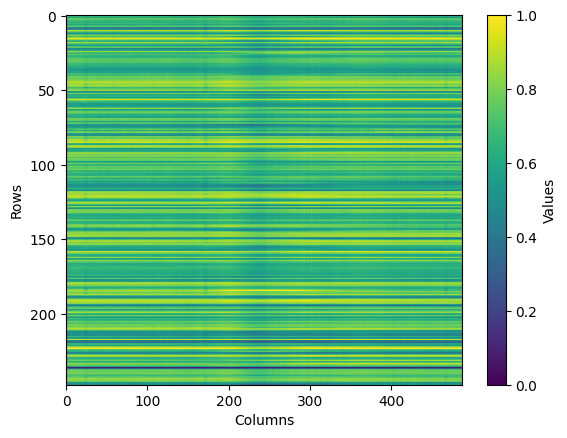

In [12]:
from sklearn.preprocessing import MinMaxScaler
import h5py
import numpy as np 
import matplotlib.pyplot as plt

def get_dataset_name(file_name_with_dir):
    file_name_without_dir = file_name_with_dir.split('/')[-1]
    temp = file_name_without_dir.split('_')[:-1]
    dataset_name = "_".join(temp)
    return dataset_name

#replace with local path
filename_path = "/Users/ellalouwenaar/Documents/Documenten - MacBook Air van Ella/Artificial Intelligence/Jaar 2/BLOK 2 (2023)/Final Project data/Intra/train/rest_105923_1.h5"
with h5py.File(filename_path, 'r') as f:
    dataset_name = get_dataset_name(filename_path)
    matrix = f.get(dataset_name)[()]
    print(type(matrix))
    print(matrix.shape) 

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(matrix)
scaled_data = scaler.transform(matrix)
print(scaled_data)

# downsampling_factor = 73 
# downsampled_arr = np.mean(scaled_data[0].reshape(-1, downsampling_factor), axis=1)
# print(downsampled_arr)
# print(downsampled_arr.shape)



def downsample(data, downsampling_factor):
    return np.mean(scaled_data[:, :(scaled_data.shape[1] // downsampling_factor) * downsampling_factor]
                           .reshape(scaled_data.shape[0], -1, downsampling_factor), axis=2)


# Downsampling factor which we can tune (should be devisor of 35624)
# 1, 2, 4, 8, 61, 73, 122, 146, 244, 292, 488, 584, 4453, 8906, 17812, 35624
downsampling_factor = 73 
test = downsample(scaled_data, downsampling_factor)
print(test.shape)


plt.imshow(test, cmap='viridis', aspect='auto')
plt.colorbar(label='Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()






